<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Fraud_Detection_%26_Prevention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

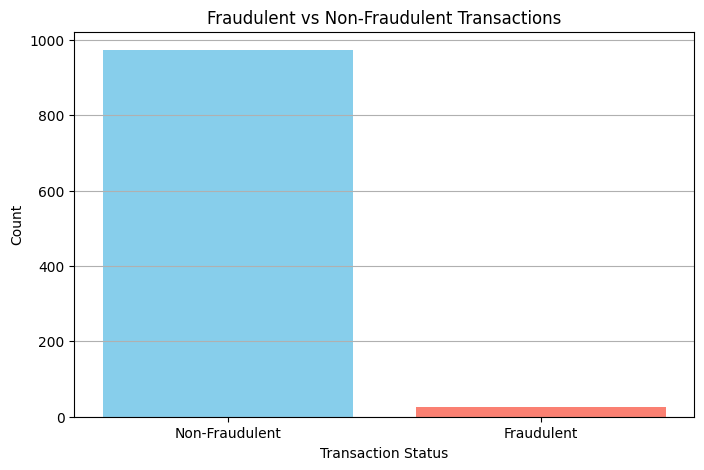

    Transaction_ID       Amount Transaction_Type   User_ID  Is_Fraud
0    Transaction_1  1875.827894           Credit   User_49      True
1    Transaction_2  4753.817961            Debit  User_195      True
2    Transaction_3  3661.309739            Debit  User_199      True
3    Transaction_4  2995.299129            Debit  User_157      True
4    Transaction_5   784.313109            Debit  User_118      True
5    Transaction_6   784.192629           Credit  User_155      True
6    Transaction_7   295.127643            Debit  User_154      True
7    Transaction_8  4331.549848           Credit   User_13      True
8    Transaction_9  3007.569484           Credit  User_134      True
9   Transaction_10  3541.822526           Credit   User_49      True
10  Transaction_11   107.819549           Credit   User_38      True
11  Transaction_12  4849.699712           Credit   User_45      True
12  Transaction_13  4163.050991            Debit   User_16      True
13  Transaction_14  1065.633858   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Simulate Transaction Data
np.random.seed(42)  # For reproducibility

# Number of transactions to simulate
num_transactions = 1000

# Generate random data for transactions
transaction_ids = [f'Transaction_{i+1}' for i in range(num_transactions)]
amounts = np.random.uniform(5, 5000, size=num_transactions)  # Amounts between $5 and $5000
transaction_types = np.random.choice(['Credit', 'Debit'], size=num_transactions)
user_ids = np.random.choice([f'User_{i+1}' for i in range(1, 201)], size=num_transactions)

# Create a DataFrame to hold the transaction data
transaction_data = pd.DataFrame({
    'Transaction_ID': transaction_ids,
    'Amount': amounts,
    'Transaction_Type': transaction_types,
    'User_ID': user_ids,
})

# Step 2: Define Fraud Detection Logic
# Simple heuristic for detecting fraud:
# - Transactions above $1000 are flagged as potentially fraudulent if they are Debit transactions
# - Transactions with unusual patterns (e.g., same user, multiple high-value transactions)
transaction_data['Fraud_Score'] = 0

# Flag high-value debit transactions as potentially fraudulent
transaction_data.loc[(transaction_data['Transaction_Type'] == 'Debit') & (transaction_data['Amount'] > 1000), 'Fraud_Score'] += 1

# Check for multiple high-value transactions by the same user
high_value_transactions = transaction_data[transaction_data['Amount'] > 1000]
multiple_transactions = high_value_transactions['User_ID'].value_counts()
potential_fraud_users = multiple_transactions[multiple_transactions > 1].index
transaction_data.loc[transaction_data['User_ID'].isin(potential_fraud_users), 'Fraud_Score'] += 1

# Determine if a transaction is potentially fraudulent
transaction_data['Is_Fraud'] = transaction_data['Fraud_Score'] > 0

# Step 3: Analyze and Visualize Results
# Count of fraudulent vs non-fraudulent transactions
fraud_counts = transaction_data['Is_Fraud'].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(fraud_counts.index.astype(str), fraud_counts.values, color=['skyblue', 'salmon'])
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Transaction Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent', 'Fraudulent'])
plt.grid(axis='y')
plt.show()

# Output the summary of transactions
print(transaction_data[['Transaction_ID', 'Amount', 'Transaction_Type', 'User_ID', 'Is_Fraud']].head(20))
